## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [7]:
df_train = pd.read_csv("Titanic_train.csv")
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [ ]:
missing_index=df_train.isnull()
display(df_train[missing_index.values==True])

## 觀察 Age

29.69911764705882
14.526497332334042


C:\Users\user\anaconda3\envs\37env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


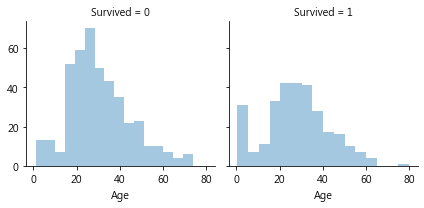

In [21]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

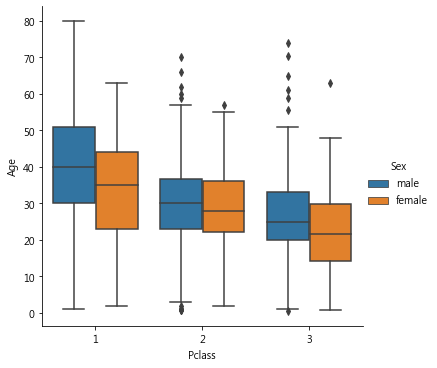

In [22]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

In [23]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])

df_train['Sex']=le.fit_transform(df_train['Sex'])

data=df_train[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
0,1,22.0,2
2,0,26.0,2
4,1,35.0,2
5,1,NaN,2
5,1,NaN,2
...,...,...,...
885,0,39.0,2
886,1,27.0,1
888,0,NaN,2
888,0,NaN,2


,0,1,2
0,1.0,22.0,2.0
2,0.0,26.0,2.0
4,1.0,35.0,2.0
5,1.0,22.0,2.0
5,1.0,22.0,2.0
...,...,...,...
885,0.0,39.0,2.0
886,1.0,27.0,1.0
888,0.0,26.0,2.0
888,0.0,26.0,2.0
